solver for Poisson and Laplace equation in 2D

this is from [http://www.eg.bucknell.edu/~mligare/ph333/laplace.html](http://www.eg.bucknell.edu/~mligare/ph333/laplace.html)

In [1]:
import numpy as np

import matplotlib as mpl  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from matplotlib import colormaps


In [2]:
def boundary(array):
    ''' set the boundary conditions '''
    n = array.shape[0]-1
    m = array.shape[1]-1
    array[:,0] = 0
    array[:,m] = 0  # Restore boundaries
    array[n,:] = 0                  # Restore boundary
    array[0,:] = 1 
    for i in range(int(n/2),n+1):
        k = int(m/2)+1
        array[i,k] = -1

In [3]:
def calculate_4(delta,limit,phi_old):
    ''' cross method for calculating the derivative'''
    
    n = phi_old.shape[0]-1
    m = phi_old.shape[1]-1
    count = 0 
    while delta > limit:
        count += 1
        phi_new = (np.roll(phi_old, 1, axis=0) + np.roll(phi_old, -1, axis=0) + np.roll(phi_old, 1, axis=1) \
                + np.roll(phi_old, -1, axis=1))/4
        # phi_new[:, 0] = phi_new[:,m] = 0  # Restore boundaries
        # phi_new[n,:] = 0                  # Restore boundary
        # phi_new[0,:] = 1                  # Restore boundary
        boundary(phi_new)
        delta = np.max(abs(phi_new - phi_old)) 
        #print ("delta is",delta,phi_old[1,20],phi_new[1,20])
        phi_new, phi_old = phi_old, phi_new # phi_new--> phi_old for next iteration
    return phi_old,count


In [4]:
def calculate(delta,limit,phi_old):
    ''' implements the improved method from Jackson'''
    n = phi_old.shape[0]-1
    m = phi_old.shape[1]-1
    count = 0
    while delta > limit:
        count +=1
        cross = (np.roll(phi_old, 1, axis=0) + np.roll(phi_old, -1, axis=0) + np.roll(phi_old, 1, axis=1) \
                + np.roll(phi_old, -1, axis=1))/4.
        square = (np.roll(np.roll(phi_old, 1, axis=0),1,axis=1) +\
                   np.roll(np.roll(phi_old, 1, axis=0),-1,axis=1) +\
                     np.roll(np.roll(phi_old, -1, axis=0),1,axis=1)+ \
                      np.roll(np.roll(phi_old, -1, axis=0),-1,axis=1))/4.
        phi_new = cross*.8 + square*.2
        
        boundary(phi_new)
        delta = np.max(abs(phi_new - phi_old)) 
        #print ("delta is",delta,phi_old[1,int(m/2)],phi_new[1,int(m/2)])
        phi_new, phi_old = phi_old, phi_new # phi_new--> phi_old for next iteration
    return phi_old,count


In [5]:
# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib inline
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (9, 4.5*1.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

Set size of array, target error and starting error

In [6]:
n = 50
m = 25
target = 1e-6
delta = 1

Set up an array - we will be using 2.  Note setting of bounday conditions

In [7]:
phi_old = np.zeros([n+1,m+1])
print (phi_old.shape)
boundary(phi_old)
#phi_old[:, 0] = phi_old[:0] = 0  # Boundary values
#phi_old[0,:] = 1                 # Boundary values

(51, 26)


Draw the initial system

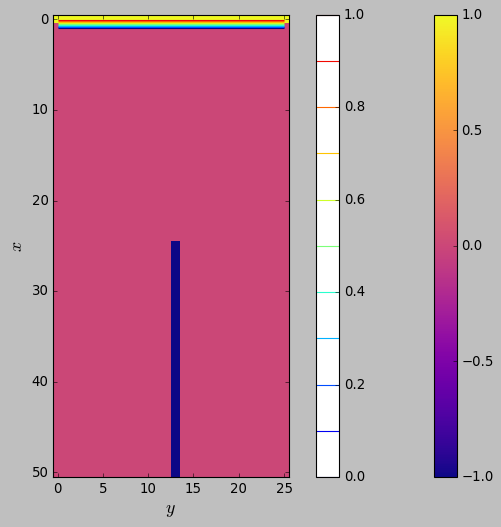

In [8]:
count = 0
plt.figure()
plt.xlabel('$y$')
plt.ylabel('$x$')
#plt.title('See Griffiths Fig. 3.18.  Newman Fig. 9.3')
fig = plt.imshow(phi_old, cmap='plasma',interpolation='none');
cb = plt.contour(phi_old,levels=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]);
cbar = plt.colorbar(fig);
cbar2 = plt.colorbar(cb);
plt.savefig("09_Poisson%3d.png"%(1000-count),transparent=False)

Loop until delta < target

Note the use of roll to find adjacent cells

Note also that one is alternating between new and old arrays so that a full update is done, not the rolling updates one would do if one was memory constrained. 

note also that boundary conditions are reset each time instead of using if statements - probably faster!


Do a start

Total is 3


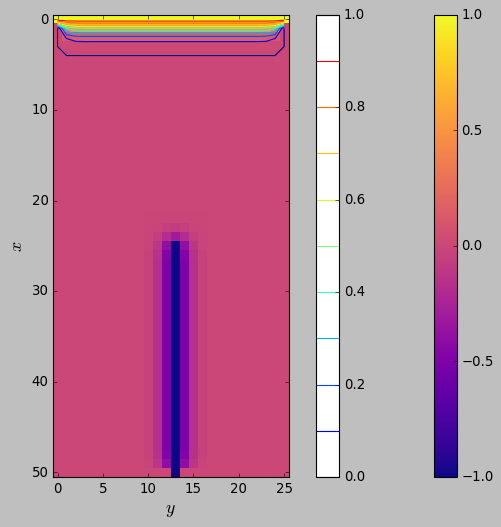

In [9]:
total = 0

phi_old,count = calculate(delta=delta,limit=0.1,phi_old=phi_old)
total += count
print ("Total is",total)

#print (phi_old)
plt.figure()
plt.xlabel('$y$')
plt.ylabel('$x$')
#plt.title('See Griffiths Fig. 3.18.  Newman Fig. 9.3')
fig = plt.imshow(phi_old, cmap='plasma',interpolation='none');
cb = plt.contour(phi_old,levels=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]);
cbar = plt.colorbar(fig);
cbar2 = plt.colorbar(cb);
plt.savefig("09_Poisson%3d.png"%(1000-count),transparent=False)

Total is 25


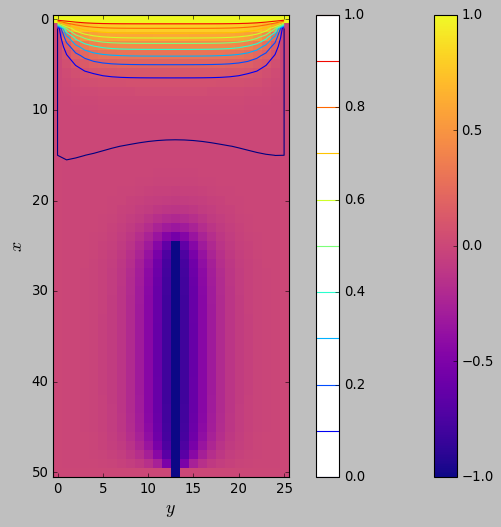

In [10]:
phi_old,count  = calculate(delta=delta,limit=0.01,phi_old=phi_old)
total += count
print ("Total is",total)
#print(phi)

#print (phi_old)
plt.figure()
plt.xlabel('$y$')
plt.ylabel('$x$')
#plt.title('See Griffiths Fig. 3.18.  Newman Fig. 9.3')
fig = plt.imshow(phi_old, cmap='plasma',interpolation='none');
cb = plt.contour(phi_old,levels=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]);
cbar = plt.colorbar(fig);
cbar2 = plt.colorbar(cb);
plt.savefig("09_Poisson%3d.png"%(1000-count),transparent=False)

Total is 131


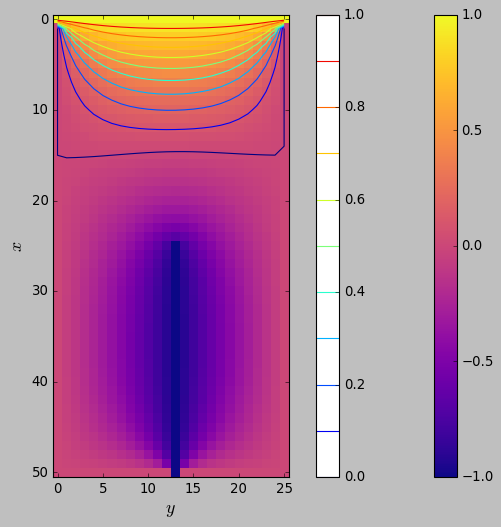

In [11]:
phi_old,count = calculate(delta=delta,limit=0.001,phi_old=phi_old)
total += count
print ("Total is",total)

#print (phi_old)
plt.figure()
plt.xlabel('$y$')
plt.ylabel('$x$')
#plt.title('See Griffiths Fig. 3.18.  Newman Fig. 9.3')
fig = plt.imshow(phi_old, cmap='plasma',interpolation='none');
cb = plt.contour(phi_old,levels=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]);
cbar = plt.colorbar(fig);
cbar2 = plt.colorbar(cb);
plt.savefig("09_Poisson%3d.png"%(1000-count),transparent=False)

Total is 271


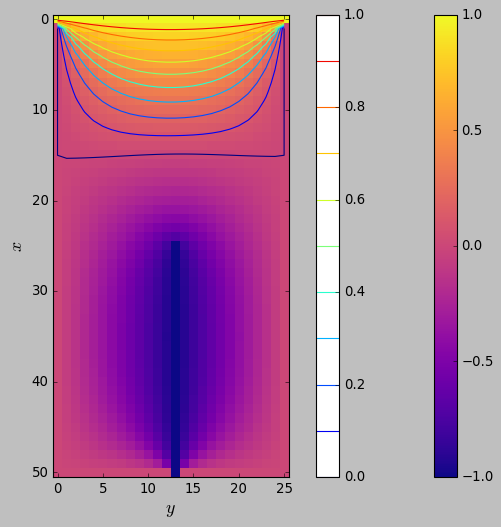

In [12]:
phi_old,count  = calculate(delta=delta,limit=0.0001,phi_old=phi_old)
total += count
print ("Total is",total)

#print (phi_old)
plt.figure()
plt.xlabel('$y$')
plt.ylabel('$x$')
#plt.title('See Griffiths Fig. 3.18.  Newman Fig. 9.3')
fig = plt.imshow(phi_old, cmap='plasma',interpolation='none');
cb = plt.contour(phi_old,levels=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]);
cbar = plt.colorbar(fig);
cbar2 = plt.colorbar(cb);
plt.savefig("09_Poisson%3d.png"%(1000-count),transparent=False)

Total is 445


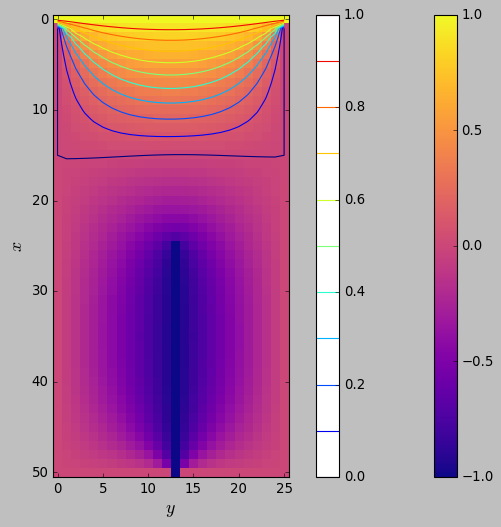

In [13]:
phi_old,count = calculate(delta=delta,limit=0.00001,phi_old=phi_old)
total += count
print ("Total is",total)

#print (phi_old)
plt.figure()
plt.xlabel('$y$')
plt.ylabel('$x$')
#plt.title('See Griffiths Fig. 3.18.  Newman Fig. 9.3')
fig = plt.imshow(phi_old, cmap='plasma',interpolation='none');
cb = plt.contour(phi_old,levels=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]);
cbar = plt.colorbar(fig);
cbar2 = plt.colorbar(cb);
plt.savefig("09_Poisson%3d.png"%(1000-count),transparent=False)

Plot the output

Now go for precision by setting delta < target

In [14]:
phi_old,count  = calculate(delta=delta,limit=0.000001,phi_old=phi_old)
total += count
print ("Total is",total)

Total is 692


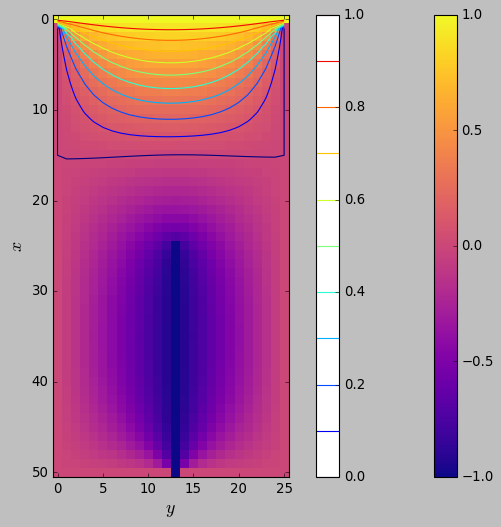

In [15]:
#print (phi_old)
plt.figure()
plt.xlabel('$y$')
plt.ylabel('$x$')
#plt.title('See Griffiths Fig. 3.18.  Newman Fig. 9.3')
fig = plt.imshow(phi_old, cmap='plasma',interpolation='none');
cb = plt.contour(phi_old,levels=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]);
cbar = plt.colorbar(fig);
cbar2 = plt.colorbar(cb);
#plt.savefig("09_Poisson.png",transparent=False)
plt.savefig("09_Poisson%3d.png"%(1000-count),transparent=False)


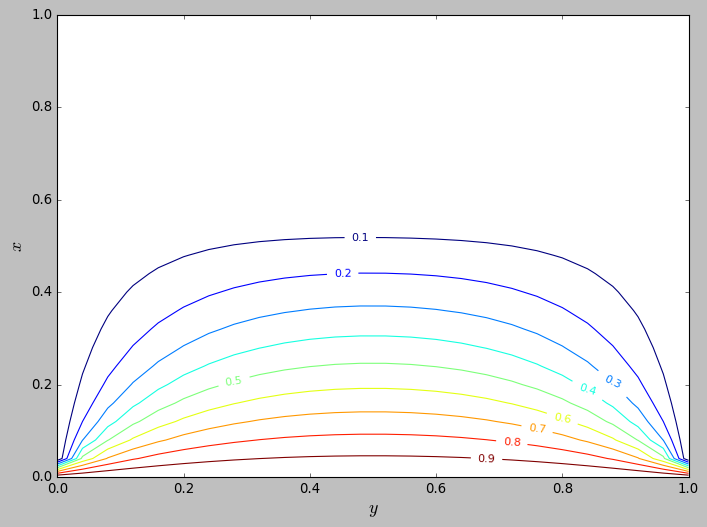

In [16]:
plt.figure()
X = np.linspace(0,1,m+1)
Y = np.linspace(0,2,n+1)
#CS = plt.contour(X, Y, phi)
CS = plt.contour(X, Y, phi_old, levels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.clabel(CS, inline=1, fontsize=10)
plt.ylabel('$x$')
plt.xlabel('$y$')
plt.ylim(0,1);